In [118]:
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sb
import scipy

In [119]:
# importing database
data = pd.read_csv('all_states_merged_8to18.csv')

# Data Exploration

In [120]:
data

Indicator  Total number of pregnant women Registered for ANC  \
0             1                                             2253.0   
1             2                                              925.0   
2             1                                             1511.0   
3             2                                             1043.0   
4             1                                             1279.0   
...         ...                                                ...   
6600         12                                            78766.0   
6601         13                                           146754.0   
6602         14                                            58172.0   
6603         15                                           154018.0   
6604         16                                            72059.0   

      Number of Pregnant women registered within first trimester  \
0                                                 739.0            
1                                                 247.0            
2                                                 611.0            
3                                                 278.0            
4                                                 896.0            
...                                                 ...            
6600                                            71127.0            
6601                                           108454.0            
6602                                            53672.0            
6603                                           134006.0            
6604                                            63896.0            

      Number of pregnant women received 3 ANC check ups  \
0                                                2007.0   
1                                                 638.0   
2                                                1491.0   
3                                                 554.0   
4                                                1255.0   
...                                                 ...   
6600                                             4417.0   
6601                                             5773.0   
6602                                            12079.0   
6603                                            10871.0   
6604                                            15796.0   

      TT2 or Booster given to Pregnant women (numbers)  \
0                                               1667.0   
1                                                584.0   
2                                               1097.0   
3                                                485.0   
4                                               1115.0   
...                                                ...   
6600                                              78.1   
6601                                              66.4   
6602                                              86.3   
6603                                              78.3   
6604                                              84.3   

      Number of Pregnant women given 100 IFA tablets  \
0                                             7857.0   
1                                             1230.0   
2                                             2674.0   
3                                             1413.0   
4                                             1397.0   
...                                              ...   
6600                                           105.6   
6601                                            77.6   
6602                                            86.3   
6603                                            97.5   
6604                                            87.5   

      Number having Hb level<11 (tested cases)  \
0                                       3496.0   
1                                       4459.0   
2                                       2715.0   
3                                       3926.0   
4                  

Data has 47 attributes. There are 6605 data examples

## 1. Univariate Analysis

In [121]:
types = pd.DataFrame(data.dtypes)
types = types.T
types

Indicator Total number of pregnant women Registered for ANC  \
0     int64                                           float64   

  Number of Pregnant women registered within first trimester  \
0                                            float64           

  Number of pregnant women received 3 ANC check ups  \
0                                           float64   

  TT2 or Booster given to Pregnant women (numbers)  \
0                                          float64   

  Number of Pregnant women given 100 IFA tablets  \
0                                        float64   

  Number having Hb level<11 (tested cases)  \
0                                  float64   

  Number having severe anaemia (Hb<7) treated at institution  \
0                                            float64           

  Number of Home deliveries  \
0                   float64   

  Number of home deliveries attended by SBA trained (Doctor/Nurse/ANM)  ...  \
0                                            float64                    ...   

  Adverse Events Following Imunisation (Others) Number of Major Operations  \
0                                       float64                    float64   

  Number of Minor Operations Total Number of Infant Deaths reported  \
0                    float64                                float64   

  Population Persons Literate Persons Main workers Persons  \
0              int64            int64                int64   

  Marginal workers Persons Non-workers Persons  \
0                    int64               int64   

  Total Number of reported live births  
0                              float64  

[1 rows x 47 columns]

In [122]:
data.dtypes.value_counts()

float64    41
int64       6
dtype: int64

So there are 41 float type and 6 integer type attributes. All attributes are discrete variables. So our prediction problem in Regression.

### 1.1 Identification of Target Attributes

We have two target attributes for two different prediction test cases.
- Prediction of number of births in the country: 
    - Target attribute: 'Total Number of reported live births'
- Prediction of number of still-births in the country:
    - Target attribute: 'Total Number of reported Still Births'
- Prediction of number of infant-deaths in the country:
    - Target attribute: 'Total Number of reported Infant Deaths'

In [123]:
data.drop("Indicator",axis = 1, inplace = True)
data

Total number of pregnant women Registered for ANC  \
0                                                2253.0   
1                                                 925.0   
2                                                1511.0   
3                                                1043.0   
4                                                1279.0   
...                                                 ...   
6600                                            78766.0   
6601                                           146754.0   
6602                                            58172.0   
6603                                           154018.0   
6604                                            72059.0   

      Number of Pregnant women registered within first trimester  \
0                                                 739.0            
1                                                 247.0            
2                                                 611.0            
3                                                 278.0            
4                                                 896.0            
...                                                 ...            
6600                                            71127.0            
6601                                           108454.0            
6602                                            53672.0            
6603                                           134006.0            
6604                                            63896.0            

      Number of pregnant women received 3 ANC check ups  \
0                                                2007.0   
1                                                 638.0   
2                                                1491.0   
3                                                 554.0   
4                                                1255.0   
...                                                 ...   
6600                                             4417.0   
6601                                             5773.0   
6602                                            12079.0   
6603                                            10871.0   
6604                                            15796.0   

      TT2 or Booster given to Pregnant women (numbers)  \
0                                               1667.0   
1                                                584.0   
2                                               1097.0   
3                                                485.0   
4                                               1115.0   
...                                                ...   
6600                                              78.1   
6601                                              66.4   
6602                                              86.3   
6603                                              78.3   
6604                                              84.3   

      Number of Pregnant women given 100 IFA tablets  \
0                                             7857.0   
1                                             1230.0   
2                                             2674.0   
3                                             1413.0   
4                                             1397.0   
...                                              ...   
6600                                           105.6   
6601                                            77.6   
6602                                            86.3   
6603                                            97.5   
6604                                            87.5   

      Number having Hb level<11 (tested cases)  \
0                                       3496.0   
1                                       4459.0   
2                                       2715.0   
3                                       3926.0   
4                                       1509.0   
...                                        ...   
6600                                     214.0   
6

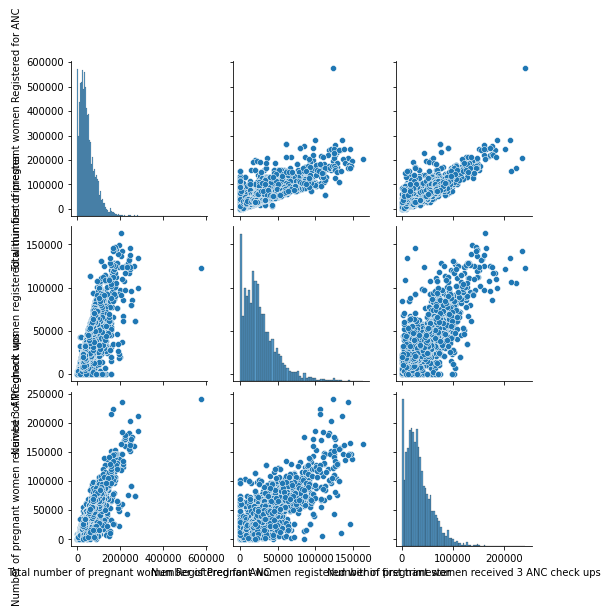

In [124]:
sb.pairplot(data, vars = ["Total number of pregnant women Registered for ANC","Number of Pregnant women registered within first trimester","Number of pregnant women received 3 ANC check ups"])
plt.show()

## 2. Multivariate Analysis

### 2.1 Counts, Mean, Standard Deviation, Minimun and Maximum values 

In [125]:
data.describe()

Total number of pregnant women Registered for ANC  \
count                                        6605.000000   
mean                                        47790.161544   
std                                         38040.702008   
min                                             0.000000   
25%                                         21046.000000   
50%                                         39148.000000   
75%                                         65140.000000   
max                                        574706.000000   

       Number of Pregnant women registered within first trimester  \
count                                        6605.000000            
mean                                        27123.208024            
std                                         22735.302152            
min                                             0.000000            
25%                                         10881.000000            
50%                                         22117.000000            
75%                                         37403.000000            
max                                        162601.000000            

       Number of pregnant women received 3 ANC check ups  \
count                                        6605.000000   
mean                                        33935.052839   
std                                         26914.712471   
min                                             0.000000   
25%                                         14971.000000   
50%                                         28291.000000   
75%                                         47119.000000   
max                                        241525.000000   

       TT2 or Booster given to Pregnant women (numbers)  \
count                                       6605.000000   
mean                                       36925.564421   
std                                        33016.240832   
min                                            0.000000   
25%                                        12370.000000   
50%                                        29649.000000   
75%                                        52517.000000   
max                                       285098.000000   

       Number of Pregnant women given 100 IFA tablets  \
count                                    6.605000e+03   
mean                                     3.536649e+04   
std                                      4.344406e+04   
min                                      0.000000e+00   
25%                                      1.268000e+04   
50%                                      2.661400e+04   
75%                                      4.621400e+04   
max                                      1.027561e+06   

       Number having Hb level<11 (tested cases)  \
count                               6605.000000   
mean                               15852.476760   
std                                19830.388268   
min                                    0.000000   
25%                                 1872.000000   
50%                                 9409.000000   
75%                                22692.000000   
max                               170012.000000   

       Number having severe anaemia (Hb<7) treated at institution  \
count                                        6605.000000            
mean                                          784.443179            
std                                          1621.633288            
min                                             0.000000            
25%                                            47.000000            
50%                                           293.000000            
75%                                           907.000000            
max                                         31936.000000            

       Number of Home deliveries  \
count                6605.000000   
mean                 6245.941862   
std                 10301.588251   
min                     0.00000

### 2.2 Median

In [126]:
median = pd.DataFrame(data.median()).T
median

Total number of pregnant women Registered for ANC  \
0                                            39148.0   

   Number of Pregnant women registered within first trimester  \
0                                            22117.0            

   Number of pregnant women received 3 ANC check ups  \
0                                            28291.0   

   TT2 or Booster given to Pregnant women (numbers)  \
0                                           29649.0   

   Number of Pregnant women given 100 IFA tablets  \
0                                         26614.0   

   Number having Hb level<11 (tested cases)  \
0                                    9409.0   

   Number having severe anaemia (Hb<7) treated at institution  \
0                                              293.0            

   Number of Home deliveries  \
0                     2052.0   

   Number of home deliveries attended by SBA trained (Doctor/Nurse/ANM)  \
0                                              468.0                      

   Number of home deliveries attended by Non SBA trained (trained TB/Dai)  \
0                                             1139.0                        

   ...  Adverse Events Following Imunisation (Others)  \
0  ...                                            3.0   

   Number of Major Operations  Number of Minor Operations  \
0                      2316.0                      3446.0   

   Total Number of Infant Deaths reported  Population Persons  \
0                                    87.0           1765333.0   

   Literate Persons  Main workers Persons  Marginal workers Persons  \
0         1106693.0              482273.0                  168094.0   

   Non-workers Persons  Total Number of reported live births  
0            1055191.0                               27804.0  

[1 rows x 46 columns]

### 2.3 Correlation among attributes

In [127]:
# Correlation Matrix 
data.corr()

Total number of pregnant women Registered for ANC  \
Total number of pregnant women Registered for ANC                                            1.000000   
Number of Pregnant women registered within firs...                                           0.823604   
Number of pregnant women received 3 ANC check ups                                            0.881471   
TT2 or Booster given to Pregnant women (numbers)                                             0.813089   
Number of Pregnant women given 100 IFA tablets                                               0.603211   
Number having Hb level<11 (tested cases)                                                     0.405826   
Number having severe anaemia (Hb<7) treated at ...                                           0.313252   
Number of Home deliveries                                                                    0.477660   
Number of home deliveries attended by SBA train...                                           0.401689   
Number of home deliveries attended by Non SBA t...                                           0.420939   
Deliveries Conducted at Public Institutions                                                  0.771384   
Number of Women Discharged under 48 hours of de...                                           0.547261   
Institutional deliveries (Public Insts.+Pvt. In...                                           0.816502   
Total reported deliveries                                                                    0.880790   
Number of C-section deliveries conducted at pub...                                           0.403213   
Number of C-section deliveries conducted at pri...                                           0.283900   
Total Number of reported Still Births                                                        0.193645   
Number of Newborns having weight less than 2.5 kg                                            0.492939   
Number of New Borns Breast Fed within 1 hour                                                 0.699821   
Sex Ratio at birth ( Female Live Bitrths/ Male ...                                          -0.115485   
Total Number of Abortions ( Spontaneous/ Induce...                                           0.301505   
Total Number of MTPs ( Public) reported                                                      0.307985   
Number of Vasectomies Conducted (Public + Pvt.)                                              0.216589   
Number of Tubectomies Conducted (Public + Pvt.)                                              0.553208   
Total Sterilisation Conducted                                                                0.555786   
IUCD Insertions done (public facilities)                                                     0.574245   
IUCD insertions done (pvt. facilities)                                                       0.318568   
Oral Pills distributed                                                                       0.409240   
Condom pieces distributed                                                                    0.405800   
Number of Infants given OPV 0 (Birth Dose)                                                   0.762278   
Number of Infants given BCG                                                                  0.852246   
Number of Infants given DPT1                                                                 0.642773   
Number of Infants given DPT2                                                                 0.648113   
Number of Infants given DPT3                                                                 0.654113   
Number of Infants given Measles                                                              0.830330   
Number of fully immunized children (9-11 months)                                             0.802277   
Adverse Events Following Imunisation (Others)                                                0.071424   
Number of Major Operations                                    

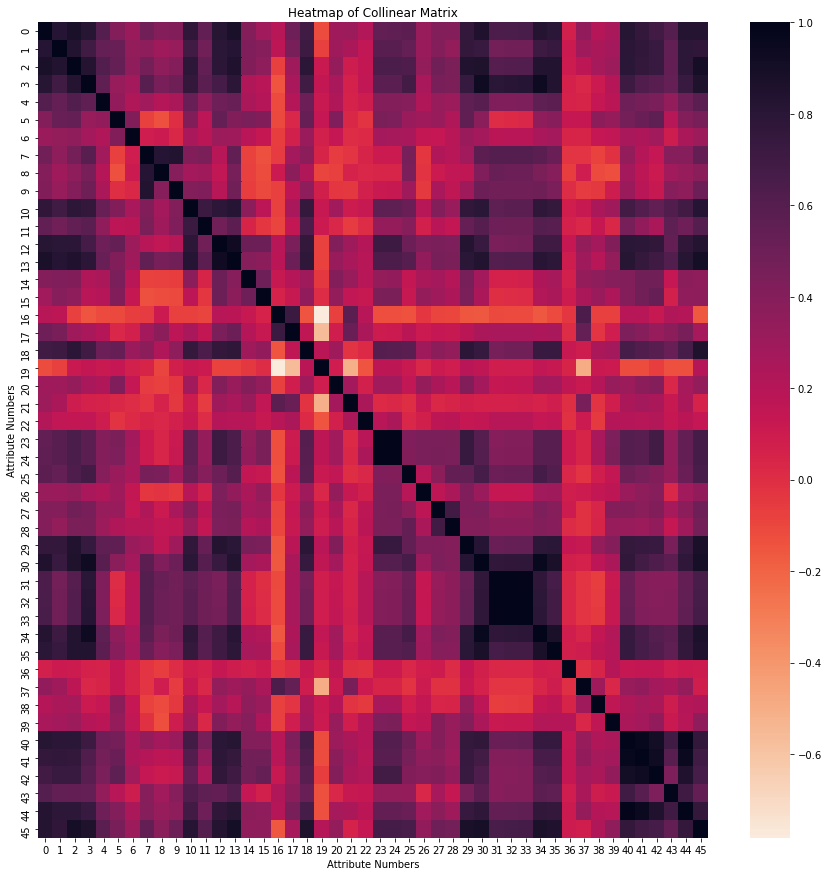

In [128]:
# Correlation Heatmap of correlation
column_numbers = np.arange(0,46,1)
data_numbers = data.copy()
data_numbers.columns = column_numbers
fig = plt.figure(figsize = (15,15))
sb.heatmap(data_numbers.corr(),cmap="rocket_r")
plt.title("Heatmap of Collinear Matrix")
plt.xlabel("Attribute Numbers")
plt.ylabel("Attribute Numbers")
plt.savefig('images/heatmap.jpg')
plt.show()
# sb.heatmap(data.corr(),annot= True)

There are lot of dark squares in above heat map. So it shows that data attributes are highly correlated to each other.

We found that the attribute 'Number of Pregnant women registered within first trimester' is highly correlated to the attributes - 'Deliveries Conducted at Public Institutions', 'Number of pregnant women received 3 ANC check ups', 'TT2 or Booster given to Pregnant women (numbers)'. This shows that women who registered within first trimester with ANC receives 3 ANC check ups, TT2 supplement are very likely to have delivery at some institution- clinic -public or private. Women those have home deliveries don't register themselves with ANC.

## 3. Missing Values Treatment

In [129]:
# Number of zeroes present in the dataset.
k = (data == 0)
k = pd.DataFrame(k.sum().sort_values(ascending = False),columns = ["Number of zeroes present"])
k[k["Number of zeroes present"] >100]

Number of zeroes present
IUCD insertions done (pvt. facilities)                                  3018
Adverse Events Following Imunisation (Others)                           2864
Number of C-section deliveries conducted at pri...                      2331
Total Number of Infant Deaths reported                                  1061
Number of Infants given DPT1                                             739
Number having severe anaemia (Hb<7) treated at ...                       661
Number of Vasectomies Conducted (Public + Pvt.)                          627
Number of Major Operations                                               622
Number of Infants given DPT2                                             615
Number of Infants given DPT3                                             577
Number of Women Discharged under 48 hours of de...                       478
Number of Minor Operations                                               455
Number having Hb level<11 (tested cases)                                 449
Total Number of MTPs ( Public) reported                                  405
Number of home deliveries attended by SBA train...                       363
Total Number of Abortions ( Spontaneous/ Induce...                       328
Number of C-section deliveries conducted at pub...                       327
Number of New Borns Breast Fed within 1 hour                             284
Oral Pills distributed                                                   249
Number of home deliveries attended by Non SBA t...                       239
Marginal workers Persons                                                 235
Non-workers Persons                                                      235
Population Persons                                                       235
Main workers Persons                                                     235
Literate Persons                                                         235
Condom pieces distributed                                                223
Number of Infants given OPV 0 (Birth Dose)                               149
Number of Infants given BCG                                              147
Number of Home deliveries                                                141
Number of Tubectomies Conducted (Public + Pvt.)                          105

So there are lot of zeroes present in the data set, but we do not know whether these are missing values or actual value of the data example is zero. So we can't do anything at this stage. To control the effect of the missing values in our result we will make sure to handle the real missing values in outlier analysis below.

## 4. Outlier Detection

#### 4.1 IQR Analysis

In [130]:
IQR = pd.DataFrame(data.apply(scipy.stats.iqr)).T
IQR

Total number of pregnant women Registered for ANC  \
0                                            44094.0   

   Number of Pregnant women registered within first trimester  \
0                                            26522.0            

   Number of pregnant women received 3 ANC check ups  \
0                                            32148.0   

   TT2 or Booster given to Pregnant women (numbers)  \
0                                           40147.0   

   Number of Pregnant women given 100 IFA tablets  \
0                                         33534.0   

   Number having Hb level<11 (tested cases)  \
0                                   20820.0   

   Number having severe anaemia (Hb<7) treated at institution  \
0                                              860.0            

   Number of Home deliveries  \
0                     7156.0   

   Number of home deliveries attended by SBA trained (Doctor/Nurse/ANM)  \
0                                             2350.0                      

   Number of home deliveries attended by Non SBA trained (trained TB/Dai)  \
0                                             4319.0                        

   ...  Adverse Events Following Imunisation (Others)  \
0  ...                                           79.0   

   Number of Major Operations  Number of Minor Operations  \
0                      6097.0                      8684.0   

   Total Number of Infant Deaths reported  Population Persons  \
0                                   311.0           1840856.0   

   Literate Persons  Main workers Persons  Marginal workers Persons  \
0         1204991.0              512453.0                  214511.0   

   Non-workers Persons  Total Number of reported live births  
0            1164465.0                               31986.0  

[1 rows x 46 columns]

In [131]:
# Finding out the number of outliers in each data attribute
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df = data.copy()
outliers = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
pd.DataFrame(outliers.sum().sort_values(ascending = False),columns=["Number of Outliers"])

Number of Outliers
Adverse Events Following Imunisation (Others)                     1106
IUCD insertions done (pvt. facilities)                             989
Number of home deliveries attended by SBA train...                 854
Number of Minor Operations                                         791
Number of Vasectomies Conducted (Public + Pvt.)                    783
Number of C-section deliveries conducted at pri...                 731
Total Number of MTPs ( Public) reported                            698
Number of Major Operations                                         669
Number of Newborns having weight less than 2.5 kg                  662
Number of Home deliveries                                          661
Number of home deliveries attended by Non SBA t...                 597
Number of C-section deliveries conducted at pub...                 551
Number having severe anaemia (Hb<7) treated at ...                 545
Condom pieces distributed                                          532
Oral Pills distributed                                             521
Sex Ratio at birth ( Female Live Bitrths/ Male ...                 505
Total Number of Abortions ( Spontaneous/ Induce...                 477
Total Number of reported Still Births                              470
Total Number of Infant Deaths reported                             468
Total Sterilisation Conducted                                      362
Number of Tubectomies Conducted (Public + Pvt.)                    353
Number of Women Discharged under 48 hours of de...                 314
Number having Hb level<11 (tested cases)                           300
Main workers Persons                                               299
Number of Pregnant women given 100 IFA tablets                     287
Number of fully immunized children (9-11 months)                   276
Number of Infants given Measles                                    263
Number of Infants given BCG                                        263
Number of Pregnant women registered within firs...                 259
IUCD Insertions done (public facilities)                           255
TT2 or Booster given to Pregnant women (numbers)                   216
Total number of pregnant women Registered for ANC                  214
Total Number of reported live births                               204
Institutional deliveries (Public Insts.+Pvt. In...                 203
Total reported deliveries                                          202
Number of pregnant women received 3 ANC check ups                  201
Number of Infants given OPV 0 (Birth Dose)                         196
Marginal workers Persons                                           193
Number of Infants given DPT2                                       190
Deliveries Conducted at Public Institutions                        189
Number of Infants given DPT3                                       184
Number of Infants given DPT1                                       179
Literate Persons                                                   179
Number of New Borns Breast Fed within 1 hour                       165
Non-workers Persons                                                151
Population Persons                                                 136

#### 4.2 ZScore Analysis

In [132]:
# Calculating z-scores
z = data.apply(scipy.stats.zscore)
z

Total number of pregnant women Registered for ANC  \
0                                             -1.197155   
1                                             -1.232067   
2                                             -1.216662   
3                                             -1.228965   
4                                             -1.222761   
...                                                 ...   
6600                                           0.814343   
6601                                           2.601722   
6602                                           0.272935   
6603                                           2.792690   
6604                                           0.638019   

      Number of Pregnant women registered within first trimester  \
0                                             -1.160583            
1                                             -1.182225            
2                                             -1.166213            
3                                             -1.180861            
4                                             -1.153677            
...                                                 ...            
6600                                           1.935630            
6601                                           3.577562            
6602                                           1.167823            
6603                                           4.701538            
6604                                           1.617554            

      Number of pregnant women received 3 ANC check ups  \
0                                             -1.186357   
1                                             -1.237226   
2                                             -1.205531   
3                                             -1.240347   
4                                             -1.214300   
...                                                 ...   
6600                                          -1.096809   
6601                                          -1.046423   
6602                                          -0.812110   
6603                                          -0.856996   
6604                                          -0.673997   

      TT2 or Booster given to Pregnant women (numbers)  \
0                                            -1.067997   
1                                            -1.100801   
2                                            -1.085262   
3                                            -1.103800   
4                                            -1.084717   
...                                                ...   
6600                                         -1.116125   
6601                                         -1.116479   
6602                                         -1.115877   
6603                                         -1.116119   
6604                                         -1.115937   

      Number of Pregnant women given 100 IFA tablets  \
0                                          -0.633264   
1                                          -0.785817   
2                                          -0.752576   
3                                          -0.781604   
4                                          -0.781973   
...                                              ...   
6600                                       -0.811700   
6601                                       -0.812345   
6602                                       -0.812145   
6603                                       -0.811887   
6604                                       -0.812117   

      Number having Hb level<11 (tested cases)  \
0                                    -0.623155   
1                                    -0.574590   
2                                    -0.662542   
3                                    -0.601470   
4                                    -0.723363   
...                                        ...   
6600                                 -0.788671   
6

In [133]:
# Understanding the results
h = []
for i in range(len(z.columns)):
    h.extend(list(z.iloc[:,i]))
    
k = pd.DataFrame(h)
k = k.describe()
k.columns = ["z-score analysis"]
k.round(3).T

count  mean  std    min    25%    50%    75%    max
z-score analysis  303830.0   0.0  1.0 -4.903 -0.533 -0.236  0.267  30.46

Mean of z-scores is 0 and standard deviation of z-scores is 1.0.<br>
Minimum value is -4.903 and maximum value is 30.46

### 4.2.1 Visualizing the z-scores tendencies

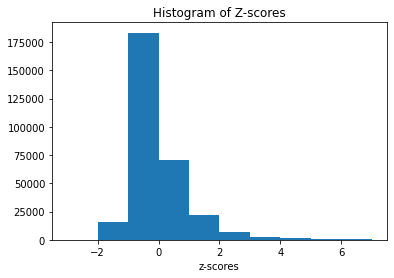

In [134]:
# Visualizing the results in histogram
bins = np.arange(-3,8,1)
plt.hist(h,bins)
plt.title("Histogram of Z-scores")
plt.xlabel("z-scores")
plt.savefig('images/zscore_histogram.png')
plt.show()


/home/aditya/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


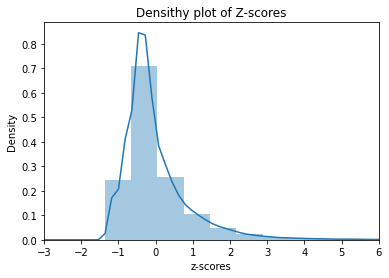

In [135]:
sb.distplot(h)
plt.title("Densithy plot of Z-scores")
plt.xlabel("z-scores")
plt.xlim(-3, 6)
plt.savefig('images/zscore_density.png')
plt.show()

### 4.2.2 Attribute outlier analysis

In [136]:
# Setting z-score Threshold
threshold = 6

# Finding which attribute contributes to outlier the most.
z_new = abs(z)>threshold
z_count = z_new[z_new == True].count(axis=0)
pd.DataFrame(z_count.sort_values(ascending = False),columns = ["Number of Outliers"])

Number of Outliers
Total Number of reported Still Births                               61
Number of Vasectomies Conducted (Public + Pvt.)                     40
Number of home deliveries attended by SBA train...                  37
Total Number of MTPs ( Public) reported                             37
Number having severe anaemia (Hb<7) treated at ...                  34
Adverse Events Following Imunisation (Others)                       33
Number of C-section deliveries conducted at pub...                  33
Number of Major Operations                                          32
Oral Pills distributed                                              29
Number of Newborns having weight less than 2.5 kg                   29
IUCD insertions done (pvt. facilities)                              28
Number of Minor Operations                                          27
Number of C-section deliveries conducted at pri...                  26
Main workers Persons                                                25
Literate Persons                                                    24
Total Number of Abortions ( Spontaneous/ Induce...                  23
Number having Hb level<11 (tested cases)                            21
Total Number of Infant Deaths reported                              20
Number of Pregnant women given 100 IFA tablets                      19
Number of Home deliveries                                           17
Number of home deliveries attended by Non SBA t...                  15
IUCD Insertions done (public facilities)                            13
Condom pieces distributed                                           11
Number of Tubectomies Conducted (Public + Pvt.)                      9
Total Sterilisation Conducted                                        9
Institutional deliveries (Public Insts.+Pvt. In...                   9
Population Persons                                                   9
Number of Infants given OPV 0 (Birth Dose)                           9
Number of pregnant women received 3 ANC check ups                    6
Number of fully immunized children (9-11 months)                     5
Non-workers Persons                                                  4
TT2 or Booster given to Pregnant women (numbers)                     3
Total number of pregnant women Registered for ANC                    3
Number of New Borns Breast Fed within 1 hour                         2
Number of Infants given DPT1                                         2
Marginal workers Persons                                             2
Number of Women Discharged under 48 hours of de...                   1
Deliveries Conducted at Public Institutions                          1
Sex Ratio at birth ( Female Live Bitrths/ Male ...                   1
Number of Infants given BCG                                          1
Number of Infants given DPT2                                         1
Number of Infants given DPT3                                         1
Total Number of reported live births                                 1
Total reported deliveries                                            0
Number of Infants given Measles                                      0
Number of Pregnant women registered within firs...                   0

It shows that every column contains decent amount of outliers, but attribute 'Number of Vasectomies Conducted (Public + Pvt.) ' contains the most outliers.<br>

### 4.2.3 Boxplot on the attributes having highest and lowest number of outiler 

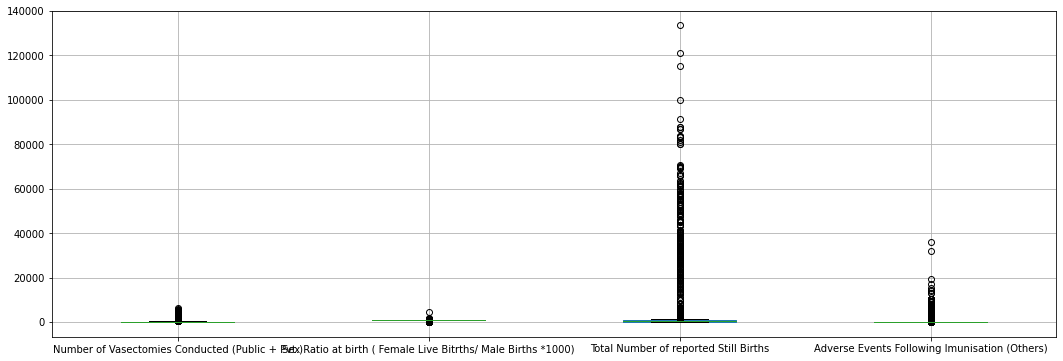

In [137]:
data.boxplot(column = ["Number of Vasectomies Conducted (Public + Pvt.)","Sex Ratio at birth ( Female Live Bitrths/ Male Births *1000)","Total Number of reported Still Births","Adverse Events Following Imunisation (Others)"],figsize=(18,6))
# plt.tight_layout()
plt.savefig('images/boxplot.png')
plt.show()

<AxesSubplot:>

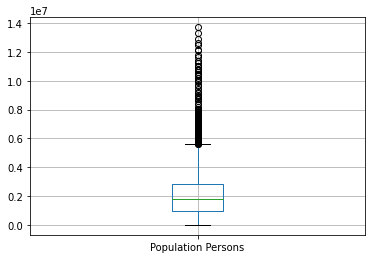

In [138]:
df.boxplot("Population Persons")

### 4.2.4 Total Number of Outliers

In [139]:
# Total number of outliers
z_count.sum()

713

## 4.3 Dropping Outliers

In [140]:
# Finding the rows containing the outliers
outlier_rows = np.where(abs(z)>threshold)
outlier_rows = list(set(outlier_rows[0]))
len(outlier_rows)

424

So there are 583 rows which has outlier values. Removing these rows from the dataset. 12.7% of rows contains the outliers.

In [141]:
# Removing outliers from the data
data.drop(outlier_rows, axis = 0, inplace = True)
data.to_csv("dataset.csv", index = False)
data

Total number of pregnant women Registered for ANC  \
0                                                2253.0   
1                                                 925.0   
2                                                1511.0   
3                                                1043.0   
4                                                1279.0   
...                                                 ...   
6591                                            28158.0   
6592                                            28137.0   
6595                                            36699.0   
6596                                            52376.0   
6602                                            58172.0   

      Number of Pregnant women registered within first trimester  \
0                                                 739.0            
1                                                 247.0            
2                                                 611.0            
3                                                 278.0            
4                                                 896.0            
...                                                 ...            
6591                                            23338.0            
6592                                            20285.0            
6595                                            32896.0            
6596                                            44625.0            
6602                                            53672.0            

      Number of pregnant women received 3 ANC check ups  \
0                                                2007.0   
1                                                 638.0   
2                                                1491.0   
3                                                 554.0   
4                                                1255.0   
...                                                 ...   
6591                                             2931.0   
6592                                              839.0   
6595                                             2427.0   
6596                                             4532.0   
6602                                            12079.0   

      TT2 or Booster given to Pregnant women (numbers)  \
0                                               1667.0   
1                                                584.0   
2                                               1097.0   
3                                                485.0   
4                                               1115.0   
...                                                ...   
6591                                              73.7   
6592                                              70.7   
6595                                              83.5   
6596                                              79.8   
6602                                              86.3   

      Number of Pregnant women given 100 IFA tablets  \
0                                             7857.0   
1                                             1230.0   
2                                             2674.0   
3                                             1413.0   
4                                             1397.0   
...                                              ...   
6591                                            80.5   
6592                                            83.5   
6595                                            89.4   
6596                                            91.0   
6602                                            86.3   

      Number having Hb level<11 (tested cases)  \
0                                       3496.0   
1                                       4459.0   
2                                       2715.0   
3                                       3926.0   
4                                       1509.0   
...                                        ...   
6591                                     115.0   
6

***
## 5. Feature Selection

In [142]:
# Filtering attributes of the data set.
attributes = [
# #                 "Indicator",
#                "Total number of pregnant women Registered for ANC",
#                "Number of Pregnant women registered within first trimester",
#                "Number of pregnant women received 3 ANC check ups",
#                "TT2 or Booster given to Pregnant women (numbers)",
#                "Number of Pregnant women given 100 IFA tablets",
#               # "Number having Hb level<11 (tested cases)",
#               # "Number having severe anaemia (Hb<7) treated at institution",
#                "Number of Home deliveries",
#                "Number of home deliveries attended by SBA trained (Doctor/Nurse/ANM)",
#               # "Number of home deliveries attended by Non SBA trained (trained TB/Dai)",
#                "Deliveries Conducted at Public Institutions",
#                "Number of Women Discharged under 48 hours of delivery in public facilities",
#                "Institutional deliveries (Public Insts.+Pvt. Insts.)",
#                "Total reported deliveries",
#               # "Number of C-section deliveries conducted at public facilities",
#               # "Number of C-section deliveries conducted at private facilities",
# #               "Total Number of reported live births",
# #               "Total Number of reported Still Births",
#                "Number of Newborns having weight less than 2.5 kg",
#                "Number of New Borns Breast Fed within 1 hour",
#                "Sex Ratio at birth ( Female Live Bitrths/ Male Births *1000)",
# #               "Total Number of Abortions ( Spontaneous/ Induced) Reported",
# #               "Total Number of MTPs ( Public) reported",
# #               "Number of Vasectomies Conducted (Public + Pvt.)",
# #               "Number of Tubectomies Conducted (Public + Pvt.)",
# #               "Total Sterilisation Conducted",
# #               "IUCD Insertions done (public facilities)",
# #               "IUCD insertions done (pvt. facilities)",
# #               "Oral Pills distributed",
# #               "Condom pieces distributed",
#                "Number of Infants given OPV 0 (Birth Dose)",
#                "Number of Infants given BCG",
#                "Number of Infants given DPT1",
#                "Number of Infants given DPT2",
#                "Number of Infants given DPT3",
#                "Number of Infants given Measles",
#                "Number of fully immunized children (9-11 months)",
#               "Adverse Events Following Imunisation (Others)",
#               # "Number of Major Operations",
#               # "Number of Minor Operations",
#               # "Total Number of Infant Deaths reported"
# #              "Population Persons",
# #              "Literate Persons",
# #              "Main workers Persons"
# #              "Marginal workers Persons",
# #              "Non-workers Persons"

              ]

# for i in attributes:
#     data.pop(i)

# 6. Prediction

## 6.1 Case 1: Predicting number of Births

#### Independent and Dependent attributes for number of Live-Births

In [195]:
#dividing the data into dependent and independent variables
data = pd.read_csv('all_states_merged_8to18.csv')
data.drop("Indicator", axis = 1, inplace = True)
# data = pd.read_csv("dataset.csv")
x = data.drop(['Total Number of reported live births'], axis=1)
y = data['Total Number of reported live births']

#### Dividing the data into training and test set

In [196]:
# dividing data into test and train set
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.09,shuffle = False)

## 6.1.1 Linear Regression Model

### Learning the model

In [197]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

# Predicting over the Train Set 
train_predict = lr.predict(train_x)

# Predicting over the Test Set 
test_predict = lr.predict(test_x)

### Evaluation of Results

In [198]:
# Mean Absolute Error
k = mae(train_predict, train_y)
print('Training Mean Absolute Error\t', k )
k = mae(test_predict, test_y)
print('Test Mean Absolute Error\t', k )

#Mean Square Error
print("Training Root Mean Square Error\t",np.sqrt(mse(train_predict, train_y)))
print("Testing Root Mean Square Error\t",np.sqrt(mse(test_predict, test_y)))

Training Mean Absolute Error	 2830.280200986205
Test Mean Absolute Error	 5086.081679365477
Training Root Mean Square Error	 5362.861539371022
Testing Root Mean Square Error	 8382.417070614656


In [199]:
print('Training Accuracy(R-square)\t',r2_score(train_y, train_predict)*100)
print('Testing Accuracy(R-square)\t',r2_score(test_y, test_predict)*100)

Training Accuracy(R-square)	 95.7267133469734
Testing Accuracy(R-square)	 93.3956749351076


In [200]:
# Coefficients and Intercept of the learned model (that is the weight vector w)
np.set_printoptions(suppress=True)
coeff = (lr.coef_)
print("Coefficient Values: ",coeff)
print("Intercept value: ",lr.intercept_)

Coefficient Values:  [ 0.0365245  -0.02414828  0.13131665  0.0092935  -0.00843497 -0.03303275
 -0.1672311   0.29762993  0.09473943  0.45669489 -0.07976531  0.03509029
  0.50488948  0.01454787  0.0187765   0.22133006 -0.45679793  0.13462615
  0.17768227 11.16181058  0.16270571  0.04182976 -1.22451431 -1.40042178
  1.39851048  0.08814134 -0.0876141   0.00700272 -0.00006108  0.14240465
  0.00361172 -0.03237768  0.2186664  -0.15190821 -0.01356492  0.03551135
 -0.22385058 -0.01614913 -0.00972167  0.97889908  0.01097152  0.00056534
 -0.01195543 -0.0110972  -0.01118158]
Intercept value:  -10380.213685471634


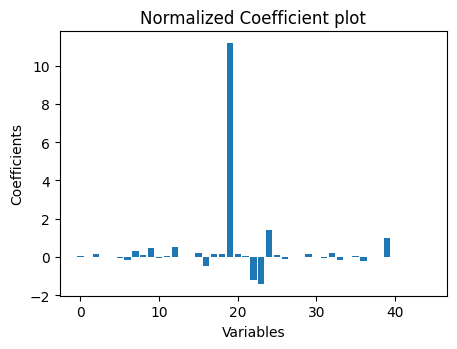

In [201]:
# Coefficient Plot
plt.figure(figsize=(5, 3.5), dpi=100, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.savefig("images/coefficient_plot.jpg")
plt.show()

Coefficient plot tells us that our target variable highly depends on 1 attribute and it is positve correlated. Coefficient values of 40 attributes is very less, this shows that only 5 attributes majorly contribute to our prediction.

#### Identifying Feature Importance

In [406]:
# Identifying the attributes which influenced the model most.
coeff = pd.DataFrame(lr.coef_,columns= ["coefficent"])
coeff.sort_values(by = "coefficent", ascending = False)
coeff[abs(coeff.coefficent)>0.9].index
column_names = train_x.columns
pd.DataFrame(column_names[coeff[abs(coeff.coefficent)>0.9].index], columns = ["Most Influencial Attributes"])

Most Influencial Attributes
0                          Number of Home deliveries
1  Number of home deliveries attended by SBA trai...
2  Number of home deliveries attended by Non SBA ...
3  Institutional deliveries (Public Insts.+Pvt. I...
4                          Total reported deliveries
5  Sex Ratio at birth ( Female Live Bitrths/ Male...
6    Number of Vasectomies Conducted (Public + Pvt.)
7    Number of Tubectomies Conducted (Public + Pvt.)
8                      Total Sterilisation Conducted

Target attribute is positively correlated with the attributes - Sex Ratio at birth, Total Sterilisation Conducted, Total Number of Infant Deaths reported and is negatively correlated with attributes - Number of Vasectomies Conducted and Number of Tubectomies Conducted. This makes sense too as Vasectomies and Tubectomies makes humans infertile and hence will reduce the number of child births.

In [151]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()
# print(len(residuals))

fitted values  predicted values     residuals
6010        76955.0      65200.341004  11754.658996
6011        41504.0      46525.360539  -5021.360539
6012        66869.0      67874.782892  -1005.782892
6013        46524.0      45866.495414    657.504586
6014        38063.0      35226.134390   2836.865610

### Residual Plot

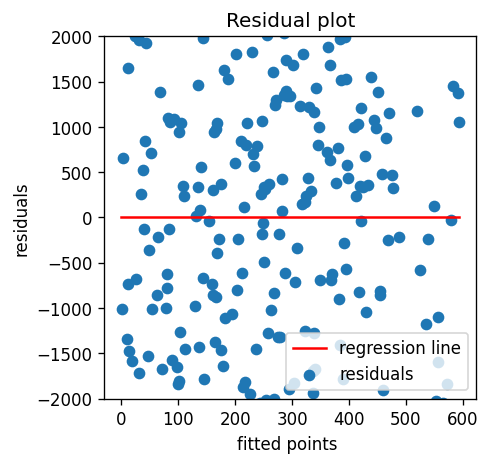

In [152]:
plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(residuals))
k = [0 for i in range(0,len(residuals))]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-2000,2000)
plt.legend()
plt.savefig("images/residual-plot.jpg")
plt.show()

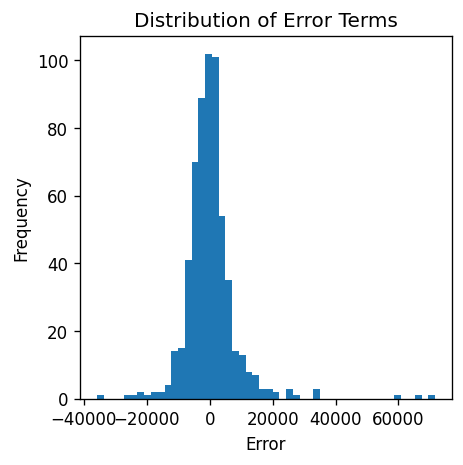

In [153]:
# Histogram for distribution
plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 50)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.savefig("images/residual-histogram.jpg")
plt.show()

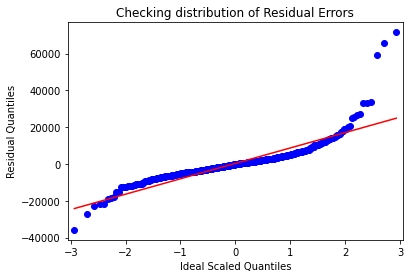

In [154]:
 # Plotting the QQ plot
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots()
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.savefig("images/residual-qqplot.jpg")
plt.show()

## 6.1.2 Random Forest

Random forest accuracy without outlier data is 98% and with outlier data is 96%

#### Independent and Dependent attributes for number of Live-Births

In [421]:
#dividing the data into dependent and independent variables
data = pd.read_csv('all_states_merged_8to18.csv')
data.drop("Indicator", axis = 1, inplace = True)

# Dropping attributes which will be not available for predicting in practical scenario
x = data.drop(['Total Number of reported live births','Total reported deliveries','Institutional deliveries (Public Insts.+Pvt. Insts.)',
       'Number of New Borns Breast Fed within 1 hour',
       'Sex Ratio at birth ( Female Live Bitrths/ Male Births *1000)','Number of Newborns having weight less than 2.5 kg','Total Number of reported Still Births','Number of C-section deliveries conducted at private facilities',
       'Number of Home deliveries'], axis=1)
y = data['Total Number of reported live births']

#### Dividing the data into training and test set

In [422]:
# dividing data into test and train set
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.09,shuffle = False)

#### Learning the model

In [423]:
# create Births regressor object of Random Forest
regressor = RandomForestRegressor(n_estimators = 25,random_state = 0)

# fit the regressor with x and y data
regressor.fit(train_x, train_y)

# predicting for train and test set
train_predict = regressor.predict(train_x)
test_predict = regressor.predict(test_x)

In [424]:
test_yLIST = list(test_y)
# for i in range(len(test_yLIST)):
#     print(test_yLIST[i],"<--->",y_pred[i])


In [337]:
 print(max(abs(test_yLIST - test_predict)))
print(len(test_yLIST))

146160.47999999998
595


#### Evaluating Results

In [425]:
# Mean Absolute Error
k = mae(train_predict, train_y)
print('Training Mean Absolute Error\t', k )
k = mae(test_predict, test_y)
print('Test Mean Absolute Error\t', k )

#Mean Square Error
print("Training Root Mean Square Error\t",np.sqrt(mse(train_predict, train_y)))
print("Testing Root Mean Square Error\t",np.sqrt(mse(test_predict, test_y)))

Training Mean Absolute Error	 1057.194615640599
Test Mean Absolute Error	 3401.966789915966
Training Root Mean Square Error	 2093.3239558461883
Testing Root Mean Square Error	 6447.811690937131


In [426]:
# R square values for training and test predicted values
print('Training Accuracy(R-square)\t',r2_score(train_y, train_predict)*100)
print('Testing Accuracy(R-square)\t',r2_score(test_y, test_predict)*100)

Training Accuracy(R-square)	 99.34890892113205
Testing Accuracy(R-square)	 96.09235951233931


#### Plot

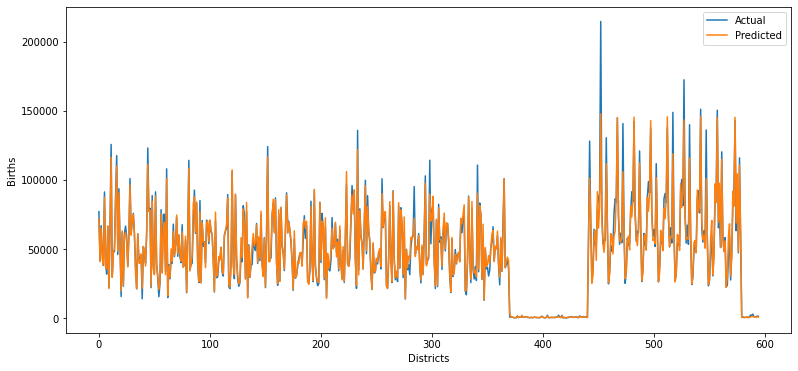

In [427]:
# Plotting Actual vs Predicted
test_yLIST = list(test_y)
impactData = []
impactData.append(test_yLIST)
impactData.append(list(test_predict))
plt.figure(figsize = (13,6))
for i in range(0,2):
    test_pred = plt.plot(impactData[i])
    test_pred = plt.xlabel('Districts')
    # test_pred = plt.ylabel('Deaths')
    test_pred = plt.ylabel('Births')
plt.legend(['Actual','Predicted'])
plt.savefig('images/RandomForestLiveBirth.jpg')
plt.show()

#### Identifying Importance of the Features 

In [374]:
# Identifying features that has most importance
print(regressor.feature_importances_)

[0.09161601 0.0018511  0.20930097 0.00450111 0.001493   0.00094048
 0.00132975 0.00256929 0.00298724 0.00673665 0.00173479 0.00189465
 0.00212681 0.00168227 0.00140742 0.00261603 0.00267634 0.00144542
 0.00096754 0.0015915  0.00211097 0.04504081 0.19215329 0.0028407
 0.00208439 0.00272512 0.0031545  0.39348276 0.00098459 0.00124535
 0.00094276 0.00164663 0.00269164 0.00162666 0.00216645 0.0015616
 0.0020734 ]


In [375]:
# Printing the name of the features those has most importance for Random Forest model.
values1 = regressor.feature_importances_
values2 = train_x.columns
listValues = []
for i in range(len(values1)):
    tmp = []
    tmp.append(values1[i])
    tmp.append(values2[i])
    listValues.append(tmp)

listValues.sort(key = lambda x:x[0],reverse = True)
for i in range(10):
    print(listValues[i][1])


Number of fully immunized children (9-11 months)
Number of pregnant women received 3 ANC check ups
Number of Infants given BCG
Total number of pregnant women Registered for ANC
Number of Infants given OPV 0 (Birth Dose)
Deliveries Conducted at Public Institutions
TT2 or Booster given to Pregnant women (numbers)
Number of Infants given Measles
Number of home deliveries attended by Non SBA trained (trained TB/Dai)
Number of Infants given DPT1


## 6.2 Case 2: Predicting number of Still-Births

Linear regression gives accuracy of 92% whereas Random Forest gives accuracy of 98%

#### Independent and Dependent attributes for number of Still-Births

In [430]:
data = pd.read_csv('all_states_merged_8to18.csv')
data.drop("Indicator", axis = 1, inplace = True)

In [431]:
x_still = data.drop(['Total Number of reported Still Births'], axis=1)
y_still = data['Total Number of reported Still Births']

In [432]:
# dividing data into test and train set
train_x,test_x,train_y,test_y = train_test_split(x_still,y_still,test_size=0.1,shuffle=False)

### 6.2.1 Linear Regression Model

#### Learning the model

In [433]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

# Predicting over the Train Set 
train_predict = lr.predict(train_x)

# Predicting over the Test Set 
test_predict = lr.predict(test_x)

#### Results

In [434]:
# Mean Absolute Error
k = mae(train_predict, train_y)
print('Training Mean Absolute Error\t', k )
k = mae(test_predict, test_y)
print('Test Mean Absolute Error\t', k )

#Mean Square Error
print("Training Root Mean Square Error\t",np.sqrt(mse(train_predict, train_y)))
print("Testing Root Mean Square Error\t",np.sqrt(mse(test_predict, test_y)))

Training Mean Absolute Error	 1023.9926194934404
Test Mean Absolute Error	 2390.0415296631895
Training Root Mean Square Error	 2235.3124754075225
Testing Root Mean Square Error	 4821.804893521151


In [435]:
# R square values for training and test predicted values
print('Training Accuracy(R-square)\t',r2_score(train_y, train_predict)*100)
print('Testing Accuracy(R-square)\t',r2_score(test_y, test_predict)*100)

Training Accuracy(R-square)	 88.12439580106799
Testing Accuracy(R-square)	 92.45550999545367


#### Plot Actual vs Predicted

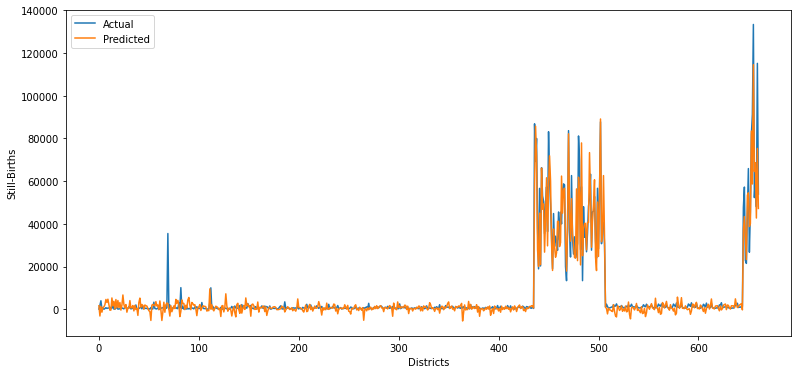

In [437]:
# Plotting Actual vs Predicted
test_yLIST = list(test_y)
impactData = []
impactData.append(test_yLIST)
impactData.append(list(test_predict))
plt.figure(figsize = (13,6))
for i in range(0,2):
    test_pred = plt.plot(impactData[i])
    test_pred = plt.xlabel('Districts')
    test_pred = plt.ylabel('Still-Births')
plt.legend(['Actual','Predicted'])
plt.savefig('images/RandomForestStillBirth.jpg')
plt.show()

#### Identifying Feature Importance

In [414]:
# Identifying the attributes which influenced the model most.
coeff = pd.DataFrame(lr.coef_,columns= ["coefficent"])
coeff.sort_values(by = "coefficent", ascending = False)
coeff[abs(coeff.coefficent)>0.9].index
column_names = train_x.columns
pd.DataFrame(column_names[coeff[abs(coeff.coefficent)>0.9].index], columns = ["Most Influencial Attributes"])

Most Influencial Attributes
0                          Number of Home deliveries
1  Number of home deliveries attended by SBA trai...
2  Number of home deliveries attended by Non SBA ...
3  Institutional deliveries (Public Insts.+Pvt. I...
4                          Total reported deliveries
5  Sex Ratio at birth ( Female Live Bitrths/ Male...
6    Number of Vasectomies Conducted (Public + Pvt.)
7    Number of Tubectomies Conducted (Public + Pvt.)
8                      Total Sterilisation Conducted

### 6.2.2 Random Forest

In [415]:
# create regressor object of Random Forest
regressor = RandomForestRegressor(n_estimators = 25,random_state = 0)

# fit the regressor with x and y data
regressor.fit(train_x, train_y)

y_pred = regressor.predict(test_x)

In [416]:
print('Training Accuracy : ',regressor.score(train_x,train_y)*100)
print('Testing Accuracy : ',regressor.score(test_x,test_y)*100)

Training Accuracy :  99.62728718459579
Testing Accuracy :  98.51452557349563


#### Identifying Importance of the Features 

In [417]:
# Identifying features that has most importance
print(regressor.feature_importances_)

[0.00259806 0.00124975 0.00025699 0.03050491 0.00038897 0.00052046
 0.00011194 0.00072458 0.00069687 0.00047195 0.00107304 0.0001137
 0.00987095 0.07348751 0.00019359 0.00016737 0.16293468 0.0002345
 0.0005019  0.00046917 0.00062046 0.00020278 0.00014589 0.00082377
 0.00086076 0.00009624 0.00013515 0.02958391 0.00088289 0.6693513
 0.00021338 0.00076391 0.00021609 0.00073538 0.00083083 0.00015996
 0.00102746 0.00113056 0.00046368 0.00047891 0.00031905 0.0007016
 0.00030407 0.00033205 0.00304904]


In [418]:
# Printing the name of the features those has most importance for Random Forest model.
values1 = regressor.feature_importances_
values2 = train_x.columns
listValues = []
for i in range(len(values1)):
    tmp = []
    tmp.append(values1[i])
    tmp.append(values2[i])
    listValues.append(tmp)

listValues.sort(key = lambda x:x[0],reverse = True)
for i in range(10):
    print(listValues[i][1])


Number of Infants given BCG
Number of Newborns having weight less than 2.5 kg
Total reported deliveries
TT2 or Booster given to Pregnant women (numbers)
Condom pieces distributed
Institutional deliveries (Public Insts.+Pvt. Insts.)
Total Number of reported live births
Total number of pregnant women Registered for ANC
Number of Pregnant women registered within first trimester
Number of Minor Operations


## 6.3 Case 3: Predicting number of Infant-Deaths

49% accuracy with linear regression and 69% accuracy with Random Forest.

In [535]:
data = pd.read_csv('all_states_merged_8to18.csv')
data.drop("Indicator", axis = 1, inplace = True)

In [536]:
x_death = data.drop(['Total Number of Infant Deaths reported'], axis=1)
y_death = data['Total Number of Infant Deaths reported']

In [537]:
# dividing data into test and train set
# train_x,test_x,train_y,test_y = train_test_split(x_death,y_death,test_size=0.09,shuffle=False)
train_x,test_x,train_y,test_y = train_test_split(x_death,y_death,test_size=0.09,random_state = 44)

### 6.3.1 Linear Regression

#### Learning the model

In [538]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)

# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)

#### Results

In [539]:
# Mean Absolute Error
k = mae(train_predict, train_y)
print('Training Mean Absolute Error\t', k )
k = mae(test_predict, test_y)
print('Test Mean Absolute Error\t', k )

#Mean Square Error
print("Training Root Mean Square Error\t",np.sqrt(mse(train_predict, train_y)))
print("Testing Root Mean Square Error\t",np.sqrt(mse(test_predict, test_y)))

Training Mean Absolute Error	 176.98444922111506
Test Mean Absolute Error	 171.44992601028855
Training Root Mean Square Error	 284.300609512833
Testing Root Mean Square Error	 265.06288848278155


In [540]:
# R square values for training and test predicted values
print('Training Accuracy(R-square)\t',r2_score(train_y, train_predict)*100)
print('Testing Accuracy(R-square)\t',r2_score(test_y, test_predict)*100)

Training Accuracy(R-square)	 48.09697806858291
Testing Accuracy(R-square)	 49.51743097935387


#### Plot Actual vs Predicted

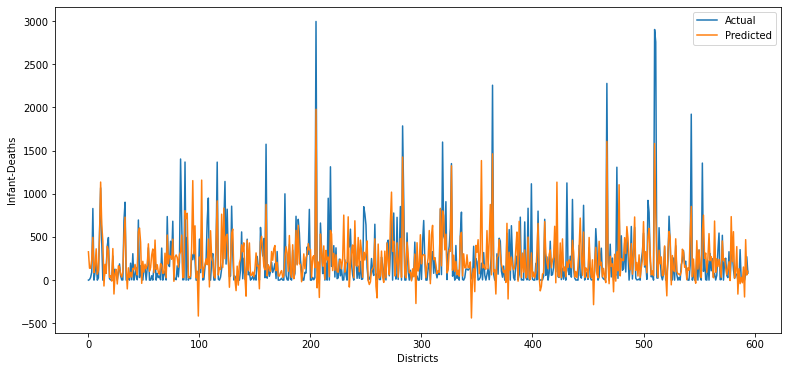

In [541]:
# Plotting Actual vs Predicted
test_yLIST = list(test_y)
impactData = []
impactData.append(test_yLIST)
impactData.append(list(test_predict))
plt.figure(figsize = (13,6))
for i in range(0,2):
    test_pred = plt.plot(impactData[i])
    test_pred = plt.xlabel('Districts')
    test_pred = plt.ylabel('Infant-Deaths')
plt.legend(['Actual','Predicted'])
plt.savefig('images/RandomForestInfantDeaths.jpg')
plt.show()

In [542]:
# Coefficients and Intercept of the learned model (that is the weight vector w)
coeff = (lr.coef_)
print("Coefficient Values: ",coeff)
print("Intercept value: ",lr.intercept_)

Coefficient Values:  [ 0.00107771 -0.00088671 -0.00198221 -0.00258871 -0.00039057  0.0006334
  0.00327435 -0.01103944 -0.02124058 -0.00500898 -0.00258202 -0.00498556
 -0.01970527  0.02799373  0.0246406  -0.0215682  -0.00826752  0.00434802
 -0.00102659  0.00712953  0.01448815 -0.00337943 -0.04032797 -0.11177873
  0.11837507 -0.00084827 -0.0225917   0.00064728  0.00000688  0.00472069
  0.00088473  0.00188911 -0.00642843  0.00447119 -0.00114928 -0.00135388
  0.04061433 -0.00029628  0.00016219  0.00239437 -0.00001812 -0.00217876
 -0.00199174 -0.00258792  0.00266929]
Intercept value:  20.742183234181795


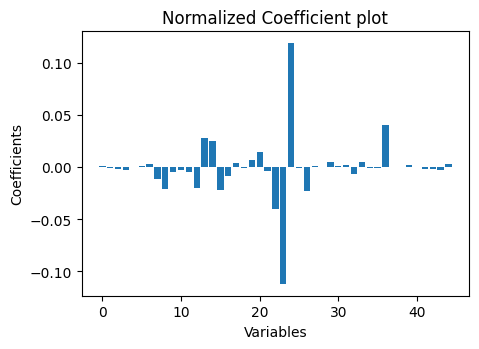

In [543]:
# Coefficient Plot
plt.figure(figsize=(5, 3.5), dpi=100, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.savefig("images/death-coefficient_plot.jpg")
plt.show()

#### Identifying Feature Importance

In [550]:
# Identifying the attributes which influenced the model most.
coeff = pd.DataFrame(lr.coef_,columns= ["coefficent"])
coeff.sort_values(by = "coefficent", ascending = False)
coeff[abs(coeff.coefficent)>0.02].index
column_names = train_x.columns
pd.DataFrame(column_names[coeff[abs(coeff.coefficent)>0.02].index], columns = ["Most Influencial Attributes"])

Most Influencial Attributes
0  Number of home deliveries attended by SBA trai...
1                          Total reported deliveries
2  Number of C-section deliveries conducted at pu...
3  Number of C-section deliveries conducted at pr...
4    Number of Vasectomies Conducted (Public + Pvt.)
5    Number of Tubectomies Conducted (Public + Pvt.)
6                      Total Sterilisation Conducted
7             IUCD insertions done (pvt. facilities)
8      Adverse Events Following Imunisation (Others)

### Residual Plot

In [519]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()
# print(len(residuals))

fitted values  predicted values   residuals
6224            0.0        327.875307 -327.875307
4314            7.0        138.360740 -131.360740
2369           33.0        137.981291 -104.981291
5062           92.0        235.868400 -143.868400
2540          829.0        495.358003  333.641997

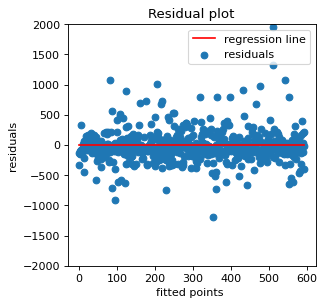

In [520]:
plt.figure(figsize=(4, 4), dpi=80, facecolor='w', edgecolor='b')
f = range(0,len(residuals))
k = [0 for i in range(0,len(residuals))]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-2000,2000)
plt.legend()
plt.savefig("images/death-residual-plot.jpg")
plt.show()

Since variance of residuals remains constant with response variable magnitude we can conclude that data-set respects homoscedasticity. But residuals are not distributed uniformly, they’re pretty symmetrically distributed, tending to cluster towards the middle of the plot.  

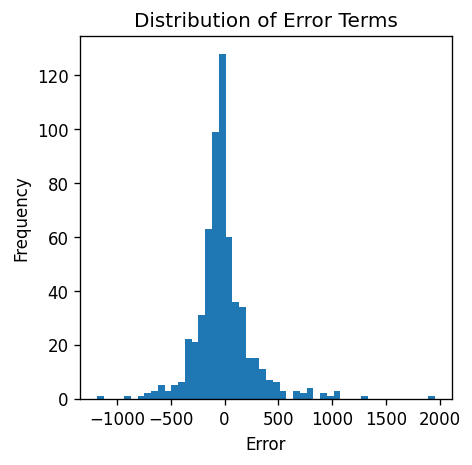

In [521]:
# Histogram for distribution
plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 50)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.savefig("images/death-residual-histogram.jpg")
plt.show()

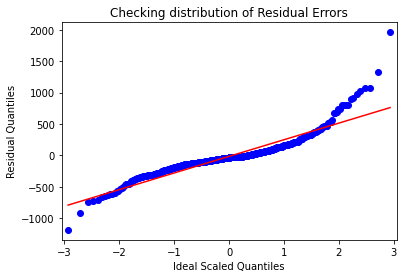

In [522]:
 # Plotting the QQ plot
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots()
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.savefig("images/death-residual-qqplot.jpg")
plt.show()

From Histogram and QQ-Plot of residuals we can say that data-set is normal for target variable - infant deaths.

Since data stasifies conditions of normality, Homoscedasticity, Linear relationship. Last thing left is check for Multicollinearity. Variance Inflation Factor test is best suited for it. If VIFk = 1, variable k is not correlated with any other independent variable. As a rule of thumb, multicollinearity is a potential problem when VIFk is greater than 4; and, a serious problem when it is greater than 10.  

## Variance Inflation Factor Test

In [523]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data = pd.DataFrame() 
vif_data["feature"] = train_x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(data.values, i) 
                          for i in range(len(train_x.columns))] 
  
vif_data = vif_data.sort_values(by = "VIF",ascending=False).reset_index(drop = True)
vif_data

feature           VIF
0                                    Literate Persons  92467.995672
1                Total Number of reported live births  35924.277775
2                           Total reported deliveries  31186.143543
3   Institutional deliveries (Public Insts.+Pvt. I...  21204.626695
4                            Marginal workers Persons   8631.852523
5                       Total Sterilisation Conducted   8035.113268
6     Number of Tubectomies Conducted (Public + Pvt.)   7671.763229
7                                 Non-workers Persons    986.105534
8   Number of home deliveries attended by Non SBA ...    828.966345
9   Number of home deliveries attended by SBA trai...    800.939126
10                       Number of Infants given DPT2    393.108369
11                       Number of Infants given DPT3    236.767165
12                          Number of Home deliveries    195.271135
13                       Number of Infants given DPT1    153.434271
14                               Main workers Persons    107.136348
15                        Number of Infants given BCG     57.573416
16                    Number of Infants given Measles     51.076832
17  Total number of pregnant women Registered for ANC     34.473289
18  Number of pregnant women received 3 ANC check ups     31.956168
19   TT2 or Booster given to Pregnant women (numbers)     29.394356
20    Number of Vasectomies Conducted (Public + Pvt.)     23.762352
21        Deliveries Conducted at Public Institutions     20.375933
22         Number of Infants given OPV 0 (Birth Dose)     20.028542
23   Number of fully immunized children (9-11 months)     13.840468
24       Number of New Borns Breast Fed within 1 hour     13.000577
25  Number of Pregnant women registered within fir...     12.573843
26              Total Number of reported Still Births     10.430285
27           IUCD Insertions done (public facilities)      5.935899
28  Number of Women Discharged under 48 hours of d...      5.747381
29  Number of Newborns having weight less than 2.5 kg      5.222202
30           Number having Hb level<11 (tested cases)      4.888577
31                          Condom pieces distributed      4.373762
32                             Oral Pills distributed      3.886984
33  Sex Ratio at birth ( Female Live Bitrths/ Male...      3.369403
34     Number of Pregnant women given 100 IFA tablets      3.042396
35  Number of C-section deliveries conducted at pu...      3.024219
36  Number of C-section deliveries conducted at pr...      3.011501
37                         Number of Major Operations      2.981212
38                                 Population Persons      2.639889
39            Total Number of MTPs ( Public) reported      2.514823
40  Total Number of Abortions ( Spontaneous/ Induc...      2.338375
41                         Number of Minor Operations      2.022216
42  Number having severe anaemia (Hb<7) treated at...      1.737876
43             IUCD insertions done (pvt. facilities)      1.717663
44      Adverse Events Following Imunisation (Others)      1.166289

Since 27 out of 46 attributes have VIF greater than 10, it shows that our data suffers from heavy multicollinearity. 

In [524]:
# Dropping the attributes having VIF>10 and again training the Model 
drop_attributes = list(vif_data[:27].feature)
data1 = data.drop(drop_attributes,axis =1)
x_death = data1.drop(['Total Number of Infant Deaths reported'], axis=1)
y_death = data1['Total Number of Infant Deaths reported']
train_x,test_x,train_y,test_y = train_test_split(x_death,y_death,test_size=0.09,random_state = 44)
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)

k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

print('Testing Accuracy : ',r2_score(test_y, test_predict)*100)

Training Mean Absolute Error 198.47459200396483
Test Mean Absolute Error     188.71690769453153
Testing Accuracy :  36.952329885748625


Accuracy of the linear regression dropped on dropping the attributes so calculating the VIF for the remaining attributes.

In [525]:
vif_data = pd.DataFrame() 
vif_data["feature"] = train_x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(data.values, i) 
                          for i in range(len(train_x.columns))] 
  
vif_data = vif_data.sort_values(by = "VIF",ascending=False).reset_index(drop = True)
vif_data[vif_data.VIF>10]

feature           VIF
0                           Condom pieces distributed  31186.143543
1                              Oral Pills distributed  21204.626695
2             Total Number of MTPs ( Public) reported    828.966345
3   Total Number of Abortions ( Spontaneous/ Induc...    800.939126
4   Sex Ratio at birth ( Female Live Bitrths/ Male...    195.271135
5      Number of Pregnant women given 100 IFA tablets     34.473289
6   Number having severe anaemia (Hb<7) treated at...     31.956168
7   Number of Women Discharged under 48 hours of d...     29.394356
8            IUCD Insertions done (public facilities)     20.375933
9            Number having Hb level<11 (tested cases)     12.573843
10                         Number of Minor Operations     10.430285

Since 11 attributes out of 19 attributes are having VIF values greater than 10 in the remaining data-set. We can conclude that attributes of data-set is highly correlated with each other and accuracy of Regression models will always suffer. Let us apply Random Forest Model on this problem statement.

### 6.3.2 Random Forest

In [526]:
data = pd.read_csv('all_states_merged_8to18.csv')
data.drop("Indicator", axis = 1, inplace = True)

In [527]:
x_death = data.drop(['Total Number of Infant Deaths reported'], axis=1)
y_death = data['Total Number of Infant Deaths reported']

In [528]:
# dividing data into test and train set
# train_x,test_x,train_y,test_y = train_test_split(x_death,y_death,test_size=0.09,shuffle=False)
train_x,test_x,train_y,test_y = train_test_split(x_death,y_death,test_size=0.1,random_state = 44)

In [529]:
# create regressor object of Random Forest
regressor = RandomForestRegressor(n_estimators = 25,random_state = 0)

# fit the regressor with x and y data
regressor.fit(train_x, train_y)

train_predict = regressor.predict(train_x)
test_predict = regressor.predict(test_x)

#### Results

In [530]:
# Mean Absolute Error
k = mae(train_predict, train_y)
print('Training Mean Absolute Error\t', k )
k = mae(test_predict, test_y)
print('Test Mean Absolute Error\t', k )

#Mean Square Error
print("Training Root Mean Square Error\t",np.sqrt(mse(train_predict, train_y)))
print("Testing Root Mean Square Error\t",np.sqrt(mse(test_predict, test_y)))

Training Mean Absolute Error	 44.47679676985195
Test Mean Absolute Error	 113.2001815431165
Training Root Mean Square Error	 87.23965230976026
Testing Root Mean Square Error	 201.14927401387413


In [531]:
# R square values for training and test predicted values
print('Training Accuracy(R-square)\t',r2_score(train_y, train_predict)*100)
print('Testing Accuracy(R-square)\t',r2_score(test_y, test_predict)*100)

Training Accuracy(R-square)	 95.12455070018713
Testing Accuracy(R-square)	 70.56988968985102


#### Plot Actual vs Predicted

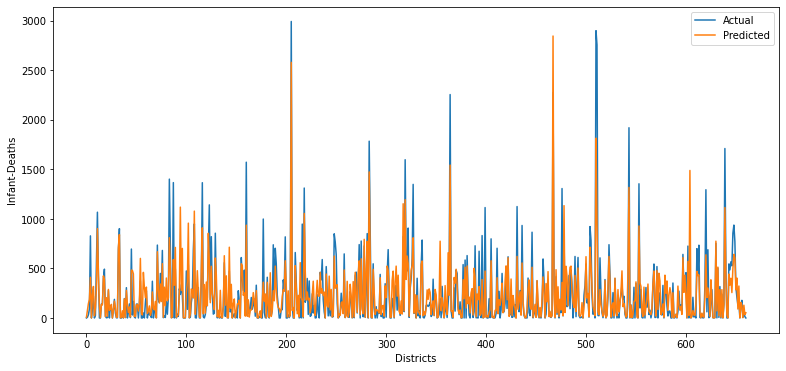

In [532]:
# Plotting Actual vs Predicted
test_yLIST = list(test_y)
impactData = []
impactData.append(test_yLIST)
impactData.append(list(test_predict))
plt.figure(figsize = (13,6))
for i in range(0,2):
    test_pred = plt.plot(impactData[i])
    test_pred = plt.xlabel('Districts')
    test_pred = plt.ylabel('Infant-Deaths')
plt.legend(['Actual','Predicted'])
plt.savefig('images/RandomForestInfantDeathrandom.jpg')
plt.show()

#### Identifying Importance of the Features 

In [533]:
# Identifying features that has most importance
print(regressor.feature_importances_)

[0.00505949 0.00637348 0.00624748 0.016551   0.00809243 0.01135031
 0.01237999 0.0092006  0.01927328 0.02220971 0.01901915 0.01258248
 0.02004781 0.006945   0.07115528 0.01581008 0.14273631 0.02109852
 0.00781575 0.0119182  0.09905306 0.00952123 0.01517311 0.01916265
 0.09826341 0.02148784 0.01551827 0.02925741 0.0073197  0.00703065
 0.0083715  0.00569789 0.00998447 0.006632   0.01109858 0.00688545
 0.01516881 0.02457208 0.01195628 0.00496665 0.0074727  0.01467291
 0.02147348 0.00843192 0.0749616 ]


In [534]:
# Printing the name of the features those has most importance for Random Forest model.
values1 = regressor.feature_importances_
values2 = train_x.columns
listValues = []
for i in range(len(values1)):
    tmp = []
    tmp.append(values1[i])
    tmp.append(values2[i])
    listValues.append(tmp)

listValues.sort(key = lambda x:x[0],reverse = True)
for i in range(10):
    print(listValues[i][1])


Total Number of reported Still Births
Total Number of Abortions ( Spontaneous/ Induced) Reported
Total Sterilisation Conducted
Total Number of reported live births
Number of C-section deliveries conducted at public facilities
Oral Pills distributed
Number of Major Operations
Number of home deliveries attended by Non SBA trained (trained TB/Dai)
IUCD Insertions done (public facilities)
Marginal workers Persons
